https://www.kaggle.com/code/akhilreddysalibindla/capstone-project#Decision-Tree-Regression
https://www.kaggle.com/code/devraai/flight-price-prediction-analysis 
https://www.kaggle.com/code/kifayatullahe/flight-price-prediction-98-accuracy 
https://medium.com/@amit25173/linear-regression-vs-random-forest-7288522be3aa

In [14]:
import sys
!{sys.executable} -m pip install seaborn 
!python -m pip install imbalanced-learn

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [16]:
flight_df = pd.read_csv("C:\\Users\\Admin\\Downloads\\merged_flights.csv")

In [25]:
flight_df

,booking_date,travel_date,route_type,travel_class,flight_number,price,total_duration,n_legs,n_stops,avg_legroom,carbon_this,carbon_route_typ,carbon_diff_pct,delayed_any,layover_total_duration,days_to_departure,price_per_minute,price_per_leg,is_direct,avg_stop_duration
0,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 985,596,1390,2,1,31.000000,1094000,1000000,9,False,125,27,0.428777,298.0,0,125.0
1,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,602,1380,2,1,33.000000,1123000,1000000,12,False,275,27,0.436232,301.0,0,275.0
2,2025-05-14 16:47:50,2025-06-11,One way,Economy,CX 742,645,1315,2,1,31.000000,888000,1000000,-11,False,245,27,0.490494,322.5,0,245.0
3,2025-05-14 16:47:50,2025-06-11,One way,Economy,QR 983,596,1485,2,1,31.000000,966000,1000000,-3,False,220,27,0.401347,298.0,0,220.0
4,2025-05-14 16:47:50,2025-06-11,One way,Economy,KE 454,606,1591,3,2,31.666667,948000,1000000,-5,True,432,27,0.380893,202.0,0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CI 794,2967,1442,3,2,NaN,2973000,3983000,-25,True,250,13,2.057559,989.0,0,125.0
169,2025-05-14 16:45:32,2025-05-28,One way,Business Class,CX 742,3112,1745,2,1,NaN,4053000,3983000,2,False,655,13,1.783381,1556.0,0,655.0
170,2025-05-14 16:45:32,2025-05-28,One way,Business Class,BR 398,3955,1260,2,1,NaN,4488000,3983000,13,False,195,13,3.138889,1977.5,0,195.0
171,2025-05-14 16:45:32,2025-05-28,One way,Business Class,OZ 730,3988,1235,2,1,NaN,3904000,3983000,-2,False,90,13,3.229150,1994.0,0,90.0


# Data Cleaning

In [17]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_date            173 non-null    object 
 1   travel_date             173 non-null    object 
 2   route_type              173 non-null    object 
 3   travel_class            173 non-null    object 
 4   flight_number           173 non-null    object 
 5   price                   173 non-null    int64  
 6   total_duration          173 non-null    int64  
 7   n_legs                  173 non-null    int64  
 8   n_stops                 173 non-null    int64  
 9   avg_legroom             93 non-null     float64
 10  carbon_this             173 non-null    int64  
 11  carbon_route_typ        173 non-null    int64  
 12  carbon_diff_pct         173 non-null    int64  
 13  delayed_any             173 non-null    bool   
 14  layover_total_duration  173 non-null    in

In [18]:
# Convert to datetime type
flight_df["travel_date"] = pd.to_datetime(flight_df["travel_date"])
flight_df["booking_date"] = pd.to_datetime(flight_df["booking_date"])

In [19]:
flight_df["n_stops"].value_counts()

n_stops
1    140
2     31
3      2
Name: count, dtype: int64

In [20]:
cleaned_df = flight_df.drop(columns=["avg_legroom", "is_direct"])

# Feature Engineering

In [21]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class']])
cleaned_df['class_encoded'] = encoder.fit_transform(cleaned_df[['travel_class']])

In [22]:
cleaned_df[["class_encoded", "travel_class"]]

,class_encoded,travel_class
0,0.0,Economy
1,0.0,Economy
2,0.0,Economy
3,0.0,Economy
4,0.0,Economy
...,...,...
168,1.0,Business Class
169,1.0,Business Class
170,1.0,Business Class
171,1.0,Business Class


# Exploratory Data Analysis

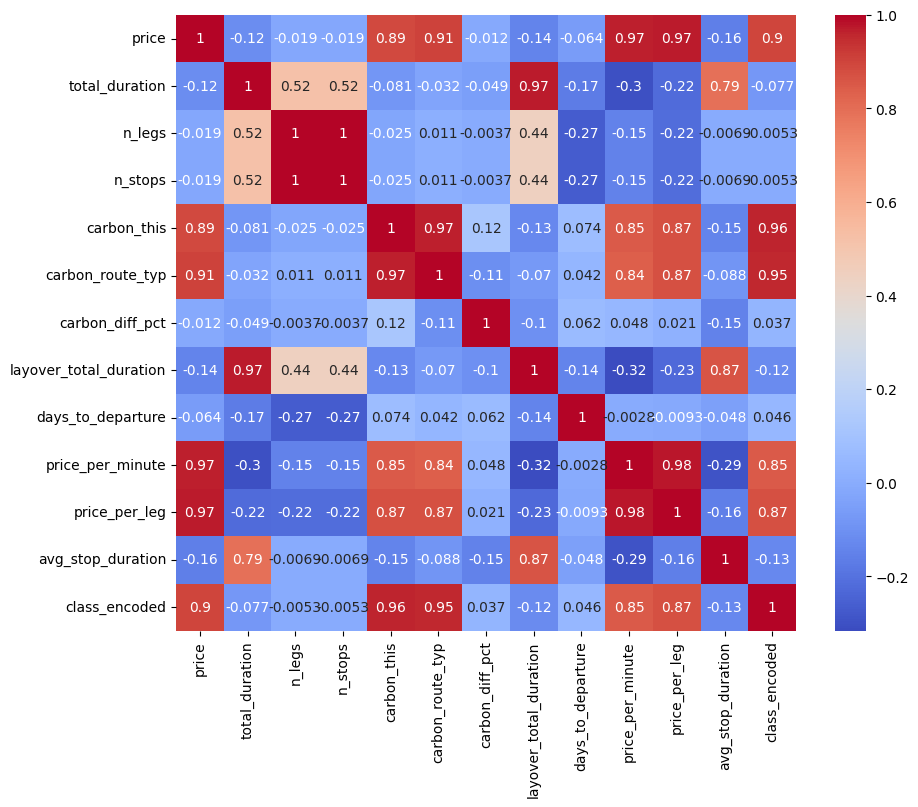

In [23]:
numeric_features = cleaned_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm")
plt.show()

The number of transit connections generate a significant difference in prices of boarding passes. There are no much low cost flights so it is hard to make any insights.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7916\3140613328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')


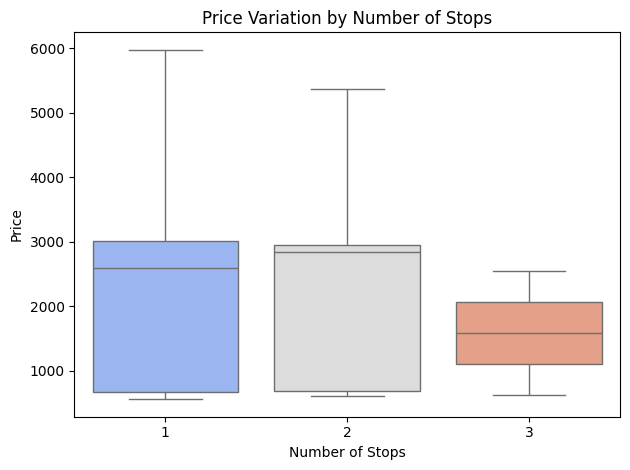

In [28]:
sns.boxplot(data=cleaned_df, x='n_stops', y='price', palette='coolwarm')
plt.title('Price Variation by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

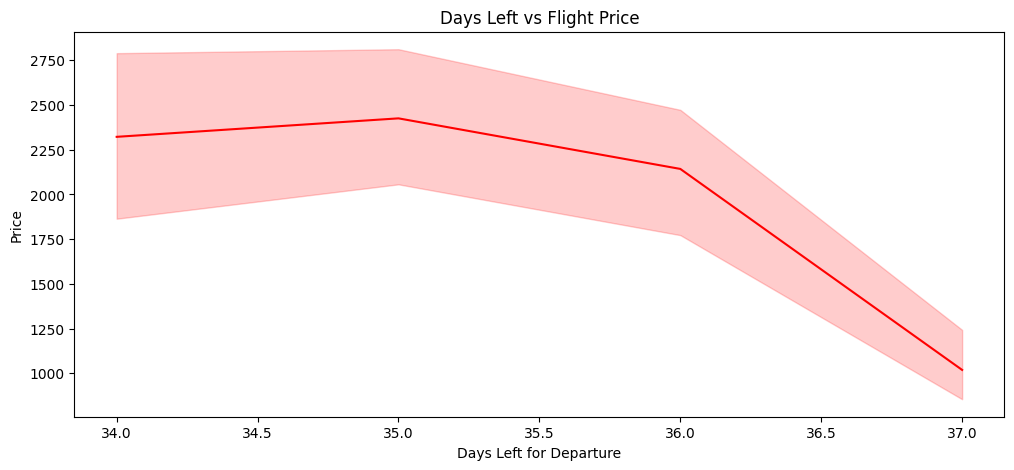

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=cleaned_df, x='days_left', y='price', color='red')
plt.title('Days Left vs Flight Price')
plt.xlabel('Days Left for Departure')
plt.ylabel('Price')
plt.show()

# Data Modelling

## Support Vector Machine

In [ ]:
flight_model = cleaned_df[cleaned_df["class_encoded"].isin([0, 1])]

In [ ]:
X = flight_model.drop(columns=["class_encoded", "travel_date", "booking_date", "airport", "airline", "airplane", "flight_number", "travel_class", "is_within_budget"])
y = flight_model["class_encoded"]

In [ ]:
cleaned_df.columns

Index(['travel_date', 'booking_date', 'airport', 'num_connections', 'airline',
       'airplane', 'flight_number', 'overnight', 'travel_class', 'price',
       'is_within_budget', 'days_left', 'class_encoded',
       'airline_type_full-service', 'airline_type_low-cost'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=10, shuffle=True, train_size = 0.6)

In [ ]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Standard Scaling
def standardize(x):
  x = pd.DataFrame(x)
  x_std = np.empty([*x.shape])
  for i in range(x.shape[1]):
    a = x.iloc[:, i].values
    x_std[:, i] = (a - np.mean(a)) / (np.std(a))
  return x_std

In [ ]:
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

# Convert class from 0 to -1, 1 remains the same
y_train_svm = (y_train * 2 - 1).astype(int)
y_test_svm = (y_test * 2 - 1).astype(int)

# Print result
print("Unique values in y_train_cls:", np.unique(y_train_svm))
print("Unique values in y_test_cls:", np.unique(y_test_svm))

Unique values in y_train_cls: [-1  1]
Unique values in y_test_cls: [-1  1]


### Original

In [ ]:
print(X)

     num_connections  overnight   price  days_left  airline_type_full-service  \
0                  3          0  2553.0         35                        1.0   
1                  3          1  2553.0         35                        1.0   
2                  3          0  2553.0         35                        1.0   
4                  1          1  2944.0         35                        1.0   
5                  1          1  2944.0         35                        1.0   
..               ...        ...     ...        ...                        ...   
294                1          1  1162.0         36                        1.0   
295                1          0  1423.0         36                        1.0   
296                1          1  1423.0         36                        1.0   
297                1          0  2970.0         36                        1.0   
298                1          1  2970.0         36                        1.0   

     airline_type_low-cost 

In [ ]:
# Train the model
svm_poly = SVC(kernel='poly', degree=1, C=1.0)  # You can change degree, C, etc.
svm_poly.fit(X_train, y_train)

# Make predictions
y_pred = svm_poly.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVM (poly kernel):", acc)

Accuracy of SVM (poly kernel): 0.9487179487179487


In [ ]:
svm.fit(X_train, y_train_svm)

# Coefficients and intercept
coef_svm = svm.named_steps["svc"].coef_
intercept_svm = svm.named_steps["svc"].intercept_

# Print result
print("beta:", coef_svm)
print("beta_0:", intercept_svm)

# Evaluate SVM and accuracy score of training data
train_loss = hinge_loss(X_train, y_train_svm, coef_svm[0], intercept_svm)
train_acc = accuracy(y_train_svm, predict_svm(X_train, coef_svm[0], intercept_svm))

print(train_loss, train_acc)

beta: [[ 0.1791587   0.42254149  1.84588466 -0.11784552]]
beta_0: [-0.25597462]
1590.9048207632532 0.3448275862068966


### Oversampling (SMOTE)

In [ ]:
# Balance class in training data
oversample = SMOTE()
X_train_1, y_train_1 = oversample.fit_resample(X_train, y_train)


# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
counter = Counter(y_train_1)
print(counter)

Counter({0.0: 114, 1.0: 114})


In [ ]:
svm.fit(X_train_1, y_train_1)

# Coefficients and intercept
coef_svm = svm.named_steps["svc"].coef_
intercept_svm = svm.named_steps["svc"].intercept_

# Print result
print("beta:", coef_svm)
print("beta_0:", intercept_svm)

beta: [[ 0.05530215  0.15146773  2.15909504 -0.26212886]]
beta_0: [0.63711007]


In [ ]:
# Evaluate SVM and accuracy score of training data
train_loss = hinge_loss(X_train_1, y_train_1, coef_svm[0], intercept_svm)
train_acc = accuracy(y_train_1, predict_svm(X_train_1, coef_svm[0], intercept_svm))

print(train_loss, train_acc)

0.5 0.5


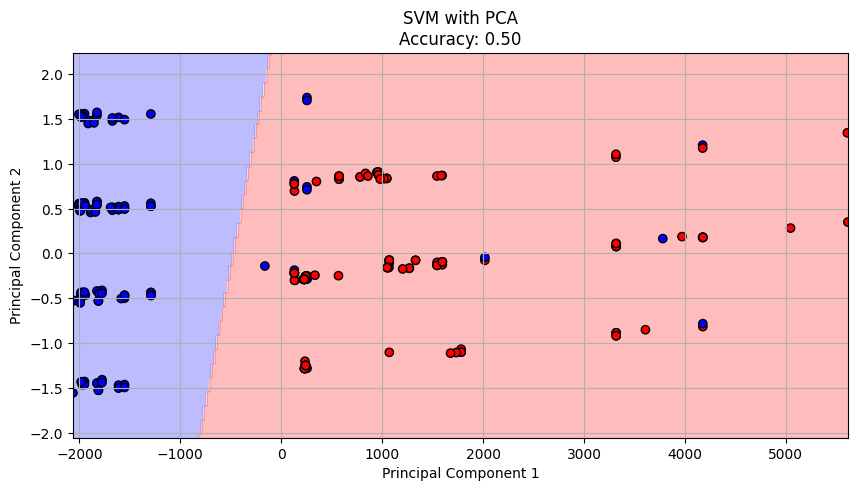

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_1)

svm.fit(X_train_pca, y_train_1)

# Update meshgrid ranges based on PCA-reduced data
xx, yy = np.meshgrid(
    np.linspace(X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5, 300),
    np.linspace(X_train_pca[:, 1].min() - 0.5, X_train_pca[:, 1].max() + 0.5, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z_svm = svm.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap='bwr')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_1, cmap='bwr', edgecolors='k')
plt.title(f"SVM with PCA\nAccuracy: {train_acc:.2f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

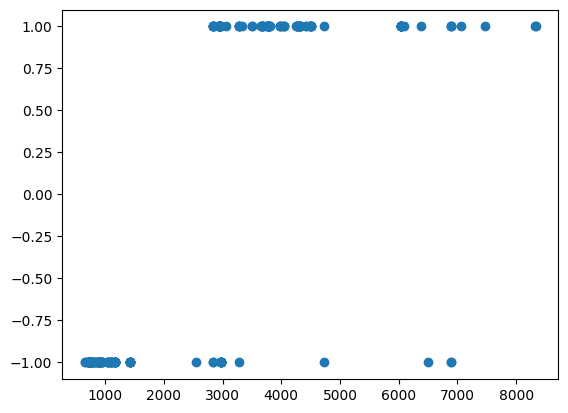

In [ ]:
plt.scatter(X_train_1["price"], y_train_svm)